## MULTIPLE REGRESSION MODEL

by Garv Arora

Note: To run this notebook, restart kernel and run all cells every time. Dataframes are mutable and running the notebook without restarting the kernel will cause errors due to previously performed operations on them.
<br>
<br>
<br>
Linear regression is a statistical machine learning method of predicting the outcome of a variable or multiple variables by using a straight line to determine a linear relationship between the target variable and the independent variable.

This is one of the most simple machine learning algorithms that estimates the slope (m) and the intercept (b) of the best-fit line known as the 'regression line'. 'm' and 'b' also denote the weight of the independent variable and the bias of the data.

y = 𝑚𝑥 + 𝑏

<br>y is the dependent variable,
<br>𝑚 is the slope of the line,
<br>𝑥 is the independent variable,
<br>𝑏 is the y-intercept.

In this case, we are setting the selling price of a house as the target variable and using 9 features to predict the house prices as shown below. In a linear regression model, using multiple features makes it a linear regression model.

y = ∑(mₙxₙ) + b

<br>n is the number of independent variables / features, 
<br>y is the dependent variable,
<br>𝑚 is the slope of the line,
<br>𝑥 is the independent variable,
<br>𝑏 is the y-intercept.

## THE DATA

Given below is a dataset for houses which has already been split for training and testing in the ratio 3:1. It contains the following features:

OverallQual - Overall material and finish quality of the house.

GrLivArea - Above-ground living area (square feet).

GarageCars - Number of cars that fit in the garage.

GarageArea - Size of the garage in square feet.

TotalBsmtSF - Total square feet of the basement area.

1stFlrSF - First-floor square footage.

FullBath - Number of full bathrooms.

TotRmsAbvGrd - Total number of rooms above ground.

YearBuilt - Year the house was built.

YearRemodAdd - Year the house was remodeled or added.

SalePrice - Sale price of the house (Target variable for prediction)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train_df = pd.read_csv(r"C:\Users\GARV OFFLINE\Desktop\ML and DS\datasets\train (7).csv")
test_df = pd.read_csv(r"C:\Users\GARV OFFLINE\Desktop\ML and DS\datasets\test (5).csv")
train_df.head(60)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000
5,5,1235,2,480,1235,1235,1,6,1961,1961,98600
6,6,1604,2,470,926,926,2,7,1997,1998,181000
7,5,816,2,816,816,816,1,4,1982,2003,138000
8,5,894,2,450,894,894,1,5,1967,2003,130000
9,4,720,0,0,720,720,1,4,1920,1950,34900


## CHECKING THE SYMMETRY OF DISTRIBUTION

We do this to check the distribution of data and shift its distribution towards the centre for curbing the effect of outliers. This shifting is done through a log transform as shown below. The target variable is log transformed.

In [2]:
train_skew_values = pd.DataFrame(train_df.skew(), columns = ['skew values'])
train_skew_values

,skew values
OverallQual,0.232100
GrLivArea,1.414698
GarageCars,-0.320204
GarageArea,0.161227
TotalBsmtSF,1.724076
1stFlrSF,1.476266
FullBath,0.056752
TotRmsAbvGrd,0.603936
YearBuilt,-0.614846
YearRemodAdd,-0.507757


In [3]:
test_skew_values = pd.DataFrame(test_df.skew(), columns = ['skew values'])
test_skew_values

,skew values
OverallQual,0.173926
GrLivArea,1.196255
GarageCars,-0.416474
GarageArea,0.261242
TotalBsmtSF,0.526471
1stFlrSF,0.958848
FullBath,-0.016203
TotRmsAbvGrd,0.892686
YearBuilt,-0.605248
YearRemodAdd,-0.486860


In [4]:
def transform(df, features, transform):
    for feature in features:
        if transform == 'log':
            df[feature] = np.log1p(df[feature])
        elif transform == 'sqrt':
            df[feature] = np.sqrt(df[feature])
        elif transform == 'sq':
            df[feature] = np.square(df[feature])
        elif transform == 'exp':
            df[feature] = np.expm1(df[feature])

        
transform(train_df, ['SalePrice','GrLivArea','1stFlrSF','TotRmsAbvGrd'], 'log')
transform(test_df, ['SalePrice','GrLivArea','1stFlrSF','TotRmsAbvGrd'], 'log')

train_rows = train_df.shape[0] 

In [5]:
train_skew_values = pd.DataFrame(train_df.skew(), columns = ['skew value'])
train_skew_values

,skew value
OverallQual,0.232100
GrLivArea,-0.020894
GarageCars,-0.320204
GarageArea,0.161227
TotalBsmtSF,1.724076
1stFlrSF,0.122694
FullBath,0.056752
TotRmsAbvGrd,-0.091885
YearBuilt,-0.614846
YearRemodAdd,-0.507757


In [6]:
test_skew_values = pd.DataFrame(test_df.skew(), columns = ['skew value'])
test_skew_values

,skew value
OverallQual,0.173926
GrLivArea,0.057701
GarageCars,-0.416474
GarageArea,0.261242
TotalBsmtSF,0.526471
1stFlrSF,-0.066678
FullBath,-0.016203
TotRmsAbvGrd,0.065948
YearBuilt,-0.605248
YearRemodAdd,-0.486860


## CORRELATION MATRIX

This matrix gives information about every feature's correlation with respect to all other features. It is helpful in detecting useful features of the data as well as observing signs of multicollinearity.

Multicollinearity is a situation in which two features which are supposed to be independent have a high correlation with each other. This means that if one independent feature increases the other one will also increase with its value. This causes our model to be less accurate as it is supposed to determine weights for features that are independent whereas these 2 features show signs of dependence on each other.

For making this model's aim of predicting the selling price challenging, only one feature of this dataset will be dropped.

In [7]:
corr_matrix = train_df.corr()
corr_matrix.style.background_gradient(cmap = 'cool').format(precision = 2)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
OverallQual,1.00,0.62,0.60,0.59,0.56,0.47,0.55,0.43,0.58,0.55,0.82
GrLivArea,0.62,1.00,0.50,0.50,0.43,0.55,0.64,0.82,0.25,0.29,0.73
GarageCars,0.60,0.50,1.00,0.89,0.44,0.45,0.50,0.37,0.55,0.43,0.69
GarageArea,0.59,0.50,0.89,1.00,0.50,0.50,0.44,0.36,0.50,0.40,0.67
TotalBsmtSF,0.56,0.43,0.44,0.50,1.00,0.77,0.32,0.29,0.40,0.30,0.61
1stFlrSF,0.47,0.55,0.45,0.50,0.77,1.00,0.38,0.41,0.30,0.24,0.61
FullBath,0.55,0.64,0.50,0.44,0.32,0.38,1.00,0.54,0.49,0.44,0.60
TotRmsAbvGrd,0.43,0.82,0.37,0.36,0.29,0.41,0.54,1.00,0.12,0.18,0.54
YearBuilt,0.58,0.25,0.55,0.50,0.40,0.30,0.49,0.12,1.00,0.60,0.59
YearRemodAdd,0.55,0.29,0.43,0.40,0.30,0.24,0.44,0.18,0.60,1.00,0.56


## FUNCTIONS TO PLOT GRAPHS

The functions defined below make it easier for plotting graphs tailored in plotting regression lines and plots of predicted points and theoretical points. The target_decider function splits the dataset into the independent features 'x' and the dependent feature (target) 'y'.

In [8]:
def target_decider(df,target_name):
    x = df.drop(target_name, axis = 1)
    y = pd.DataFrame(df[target_name].values.reshape(-1,1), columns = [target_name])
    return x, y

def plotter(x, y, col):
    plt.scatter(x[col], y, color = 'black')
    plt.xlabel(col)
    plt.ylabel(f"{y.columns.values[0]}")

def multi_plotter(df, features, target):
    i = 0
    for col in features:
        color = ['deeppink', 'yellow', 'cyan', 'green', 'black', 'magenta','blueviolet', 'orange' , 'lime', 'blue', 'red']
        plt.scatter(df[col], df[target], color = color[i % 10], label = col)
        plt.xlabel("ALL FEATURES")
        plt.ylabel(f"{target[0]}")
        i+=1
    plt.legend(title = 'FEATURES')

def prediction_plotter(test_df, m, b, x_test, y_test, col):
    if isinstance(col, str):      
        plt.scatter(test_df[col], y_test, color = 'black', label = 'Expected points')
        plt.scatter(test_df[col], np.dot(x_test, m) + b, color= 'red', label = 'Predicted points')
        plt.xlabel(col)
        plt.ylabel(f"{y_test.columns.values[0]}")
        plt.legend()
    elif isinstance(col, list):
        for column in col[:-1]:
            plt.scatter(test_df[column], np.dot(x_test, m) + b, color= 'red')
        plt.scatter(test_df[column], np.dot(x_test, m) + b, color= 'red', label = 'Predicted points')
        plt.xlabel("ALL FEATURES")
        plt.ylabel(f"{y_test.columns.values[0]}")
        plt.legend()   

# a redundant scatter statement outside the for loop to stop output of more than 1 label for predicted points in the legend

def line_plotter(m, b, lower_x, upper_x, col):
    m = np.abs(m)
    b = abs(b)
    if isinstance(col, str):        
        plt.plot(list(range(lower_x, upper_x)), [m[encoded_features[col]] * x + b for x in range(lower_x, upper_x)], color='red', label = 'Regression line')
    elif isinstance(col, list):
        plt.plot(list(range(lower_x, upper_x)), [np.mean(m) * x + b for x in range(lower_x, upper_x)], color = 'red', label = 'Regression line')
    plt.legend()

## IQR FILTERING AND DROPPING A FEATURE

After observing the correlation matrix, 'GarageCars' was dropped as it was not as relevant as 'GarageArea' for predicting 'SalePrice'. If the cars are small, despite the same area, the number of cars could increase. If the cars are big, that number could decrease. So 'GarageArea' explains the influence of the garage in the selling price of the house more effectively than 'GarageCars'.

Finally, rows with obvious outliers are also removed through IQR (Interquartile Range) filtering. Q3 consists of the row value that is 75% greater than the values below it. The Interquartile Range lies between 25% and 75% of the dataset, where % denotes percentile.

A threshold of 3.7 is applied. This means that any rows with independent feature values greater than the value at 3.7 times the IQR range above the 75% mark will be considered outliers and removed.

In [9]:
outlier_features = list(train_df.columns.values)[:-1]

Q1 = train_df[outlier_features].quantile(0.25)
Q3 = train_df[outlier_features].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + IQR * 3.7

train_df = train_df[(train_df[outlier_features] <= upper_bound).all(axis=1)]
train_df = train_df.reset_index(drop=True)

print(f"{train_rows-train_df.shape[0]} rows removed after outlier removal.")

garage_cars_col = test_df.GarageCars

train_df.drop(['GarageCars'], axis = 1, inplace = True)
test_df.drop(['GarageCars'], axis = 1, inplace = True)

2 rows removed after outlier removal.


## GRAPHICAL REPRESENTATION OF 'SalePrice' WITH ALL OTHER FEATURES

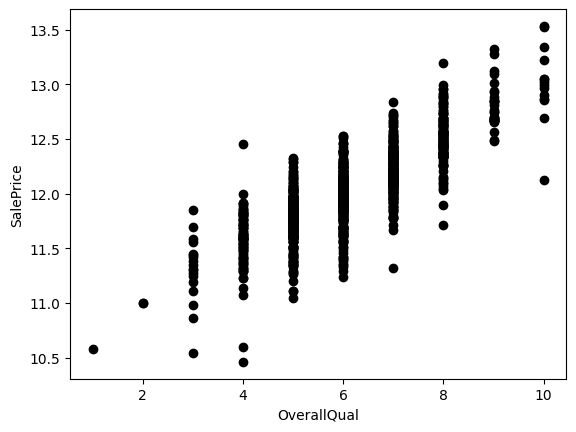

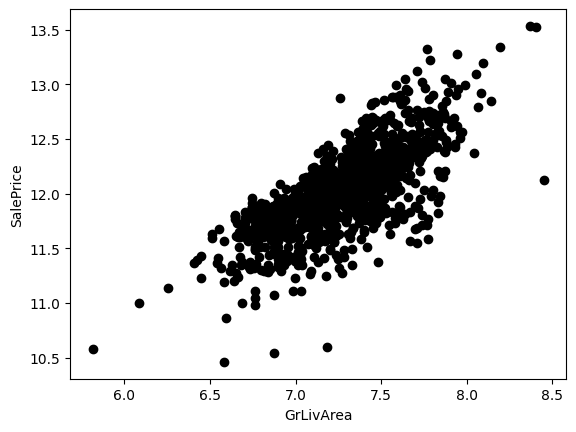

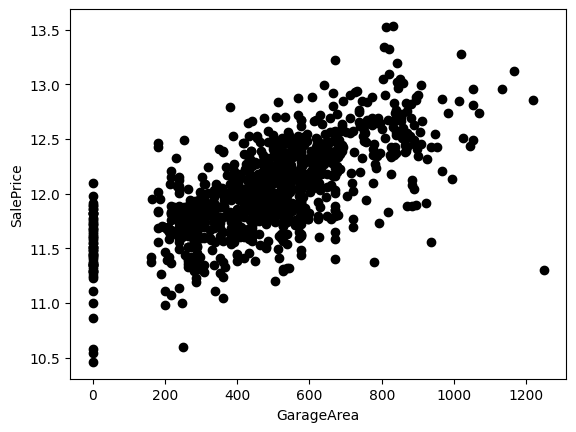

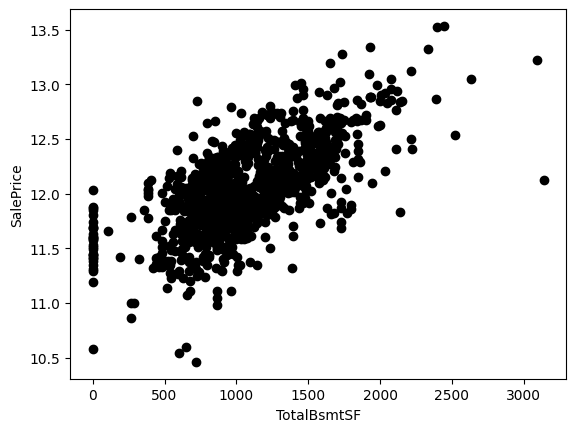

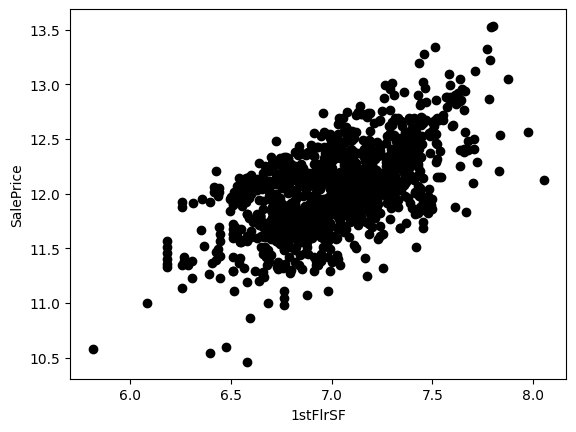

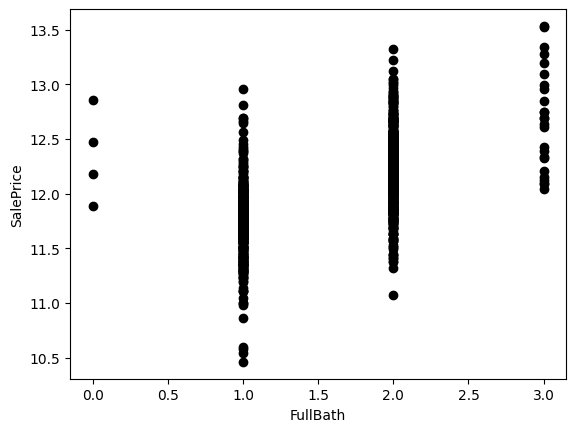

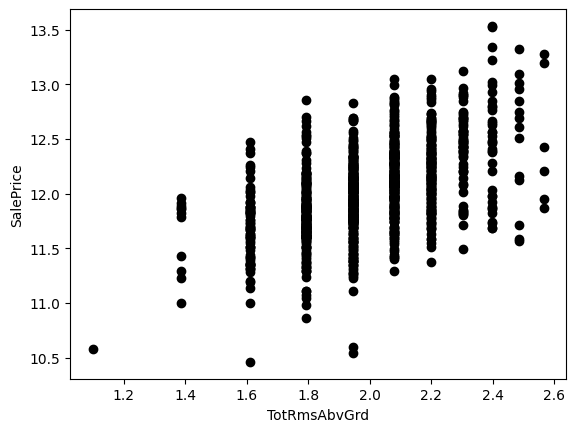

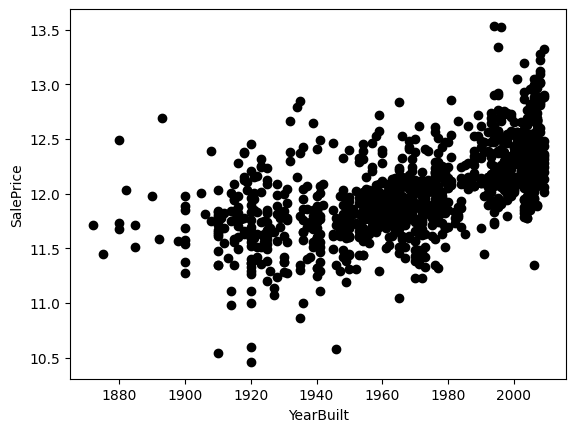

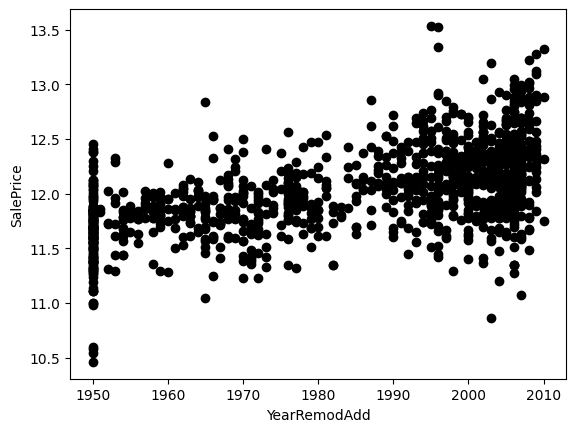

In [10]:
x1, y1 = target_decider(train_df,'SalePrice')
x2, y2 = target_decider(test_df, 'SalePrice')

features = list(x1.columns.values)
target = list(y1.columns.values)
encoded_features = dict()

for i, feature in enumerate(features):
    encoded_features[feature] = i

for col in features:
    plotter(x1, y1, col)
    plt.show()

## STANDARDIZATION OF TRAINING AND TESTING DATA

This is done so that all features are within the same scale, and in this way the model will not prioritise a feature with usual higher values over another feature with lower values. 

For example, say 'SalePrice' is targeted by independent features of 'TotRmsAbvGrd' and 'YearRemodAdd'. 'SalePrice' will have values in 6 figures or 5 figures, while total number of rooms would at best be a 2 digit value, and year of renovation would lie mostly between the 19th and 21st century. 

All these 3 features are on different scales, and our model doesn't know this. It will create weights heavily influenced by 'SalePrice' just because it has the largest values, which is usual for it as a feature.

In [11]:
def feature_scale(df, train_df, columns):
    scaled_df = df.copy()
    for col in columns:
        scaled_df[col] = ( scaled_df[col] - train_df[col].mean() ) / train_df[col].std()
    return scaled_df

x_train, y_train = feature_scale(x1, x1, features), pd.DataFrame(feature_scale(y1, y1, target),columns = target)
x_test, y_test = feature_scale(x2, x1, features), pd.DataFrame(feature_scale(y2, y1, target),columns = target)

## PLOTTING ALL FEATURES AT ONCE

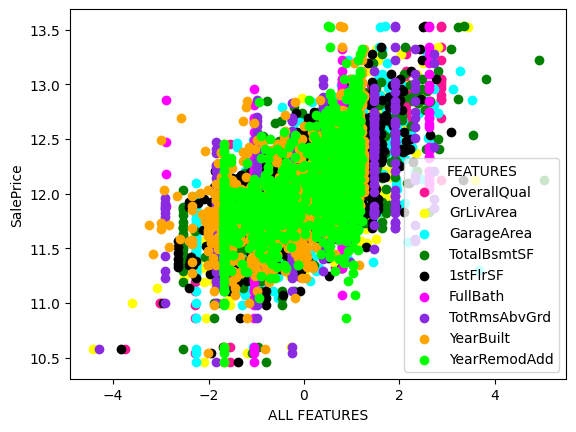

In [12]:
train_fscaled_df = feature_scale(train_df, train_df, features)
multi_plotter(train_fscaled_df, features, target)
plt.show()

## COMPONENTS OF THE MULTIPLE REGRESSION MODEL

## MSE (Mean Square Error): 
It is the mean of the squares of residuals of every single point on the graph between the regression line. This will serve as the cost function to evaluate how much error the model is able to reduce.

Cost function is defined as the difference in the values between the theoretical target values and the predicted targeted values. In this case our cost function is:

MSE = (1/n) ∑(y - (mx +b))² or (1/n) ∑(y - yₚ)² or (1/n) ∑(error)²
 
## R² score: 
It determines how accurate the model is performing:

R² score = 1 - (SSE / TSS)

where SSE is the sum of squared residuals and TSS is the total sum of squares.

SSE = ∑(y - (mx +b))² or ∑(y - yₚ)²
TSS = ∑(y - ȳ)²

ȳ is the mean of all target values,
yₚ is the predicted target value.

## Batch divider: 
This function divides the training data into batches. This is done for batch normalization and later on can be used for cross-validation as well.  Batch normalization in this case is a useful technique as dividing the dataset into batches for training will allow the model to explain the variance of the data better than it would if the entire dataset at full size is trained at once.


## Gradient descent: 
The process of finding the minimum value of the cost function (least error) is called gradient descent. The cost function is partially differentiated with respect to m to find the maximum value of m so that the cost function is minimum:

∂(C.F) / ∂m = (2 / n) ∑ x(y - yₚ)

and the cost function is partially differentiated with respect to b to find the maximum value of b so that the cost function is minimum:

∂(C.F) / ∂b = (2 / n) ∑ (y - yₚ)

If ∂(C.F) / ∂m be the 'm_gradient' and ∂(C.F) / ∂b be the 'b_gradient', then the values of m and b are updated by the process as follows:

m = m - L * m_gradient
<br>b = b - L * b_gradient

The values of m and b are updated with each epoch, here L is the learning rate. It controls the step size of the descent towards the cost function.
These updated values of m and b are again put into the gradient descent function and their values get continuously updated until they converge towards a particular value and the updates made are negligible.

For this model, stochastic gradient descent technique is used. Stochastic gradient descent is a method of gradient descent typically used for large datasets. In this method, the gradient descent is performed for each sample of the dataset, and based on its values, the weights and bias are updated. Then the gradient descent is perfomed on the next sample and the weights and bias are updated from the values of the previous weights and bias. This need not be a single sample, even a small batch of 5 - 30 samples can be used. Depending on the dataset size, the batch size is variable.

In [13]:
def MSE(y, yp, n):
    error = np.sum((y - yp) ** 2)
    return error / n

def r2score(y, yp):
    y = y.flatten()
    yp = yp.flatten()
    TSS = np.sum(np.square(y - np.mean(y)))
    SSE = np.sum(np.square(y - yp))
    return (1 - (SSE / TSS))
    
def batch_divider(feature_array, target_array, parts = 1):    
    X_batches = np.array_split(feature_array, parts)
    Y_batches = np.array_split(target_array, parts)
    return X_batches, Y_batches

def gradient_desc(X, Y, m, b, LR, y_pred, n, λ = 0):
    y_pred = np.dot(X, m) + b  
    error = y_pred - Y  

    m_gradient = (2 / n) * (np.dot(X.T, error) + m*λ)
    b_gradient = (2 / n) * np.sum(error)

    m -= LR * m_gradient
    b -= LR * b_gradient
    
    return m, b, y_pred, LR

## LINEAR REGRESSION

The training data is divided into batches. For each batch, the weights and bias are updated based on the number of epochs at the specified learning rate. The cost function at the last epoch for each batch is recorded in a list. This list is then sorted in ascending order according to the value of the cost function. The first element of this list is the batch having the least cost function is chosen and so are the weights and bias corresponding to that batch to draw the best-fit line.

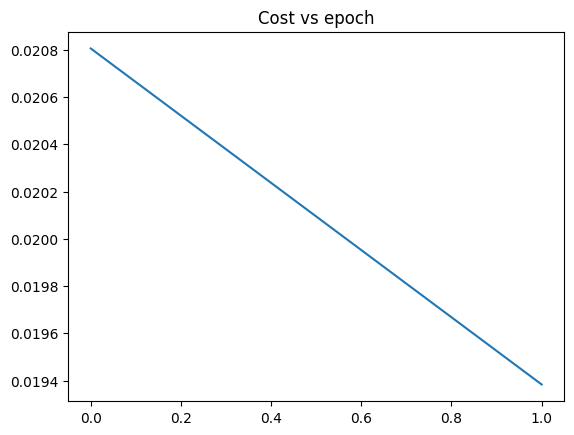

Epoch 1 : Cost 0.02080545083136106
Epoch 2 : Cost 0.01938343404783005


In [14]:
def Linear_Regression(x_train, y_train, LR, epochs, parts, λ = 0):
    x = x_train.values
    y = y_train.values.reshape(-1)
    
    columns = x.shape[1]
    m = np.zeros(columns)
    b = 0

    X_batches, Y_batches = batch_divider(x, y, parts)
    info_list = [] 
    for X_batch, Y_batch in zip(X_batches, Y_batches):
        costs_list = []
        X = X_batch
        Y = Y_batch.reshape(-1)
        n = len(X)   
        
        y_pred = 0
        for epoch in range(epochs):
            m, b, y_pred, LR = gradient_desc(X, Y, m, b, LR, y_pred, n, λ)
            cost = MSE(Y, y_pred, n) + λ * np.sum(m**2)
            costs_list.append(cost)
        
        info_list.append((m, b, cost, costs_list, X_batch, Y_batch))

    sorted_info_list = sorted(info_list, key = lambda values : values[2])

    best_costs = sorted_info_list[0][3]
    coeff = sorted_info_list[0][:2]
    final_x_batch = sorted_info_list[0][4]
    final_y_batch = sorted_info_list[0][5]
   
    plt.plot(range(len(best_costs)),np.array(best_costs))
    plt.title("Cost vs epoch")
    plt.show()
    for i in range(len(best_costs)):
        print(f"Epoch {i+1} : Cost {best_costs[i]}")

    return coeff, final_x_batch, final_y_batch

LR = 0.01
parts = train_df.shape[0]/8
epochs = 2
λ = 0.0

coeff, x_trained, y_trained = Linear_Regression(x_train, y_train, LR, epochs, parts, λ)
x_trained = pd.DataFrame(x_trained, columns = features)
y_trained = pd.DataFrame(y_trained, columns = target)

Due to numpy vectorization combined with the values of m and b from the previous batch, the cost function doesnt require a lot of time and epochs to be minimised.

## VISUALISING TRAINING DATA RESULTS

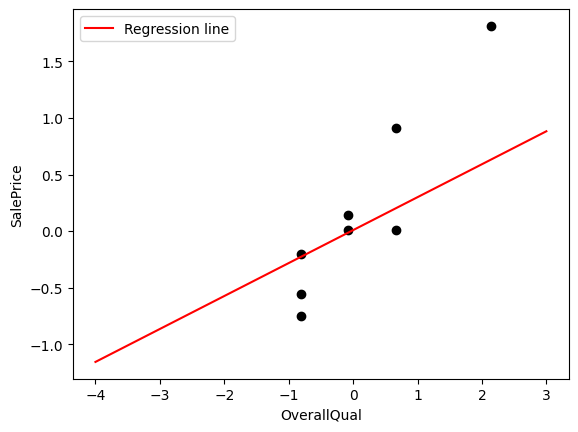

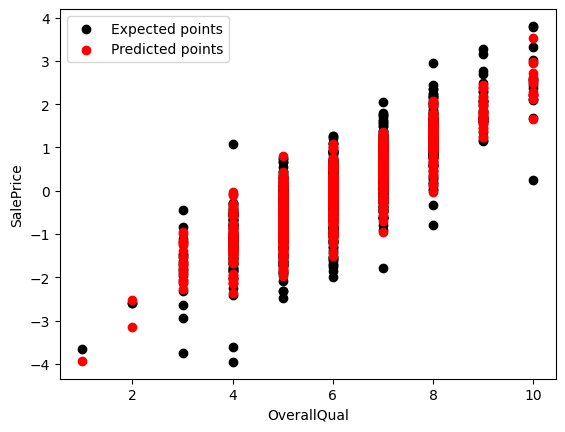

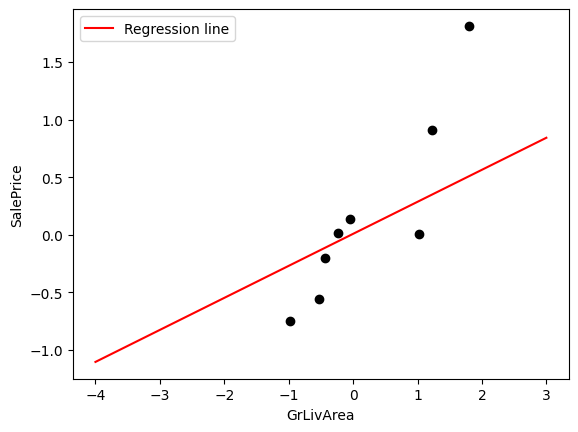

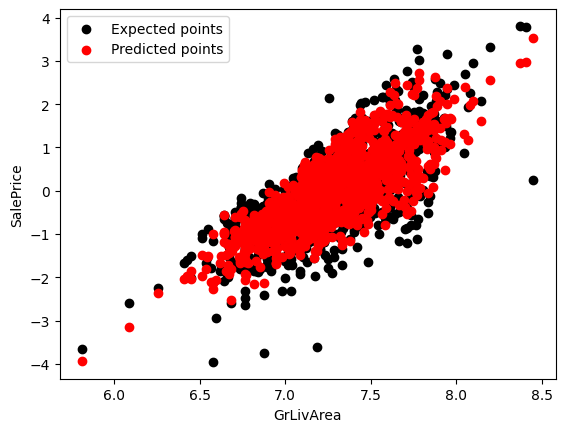

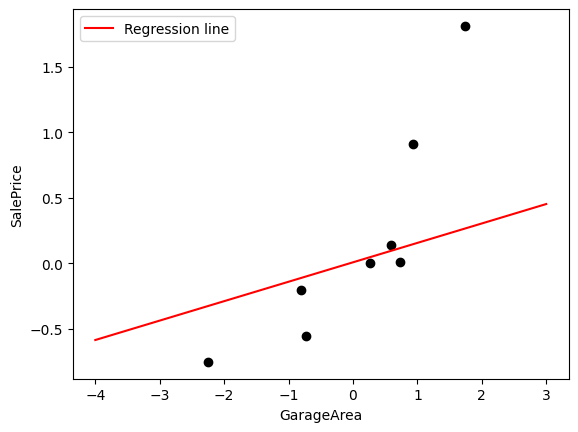

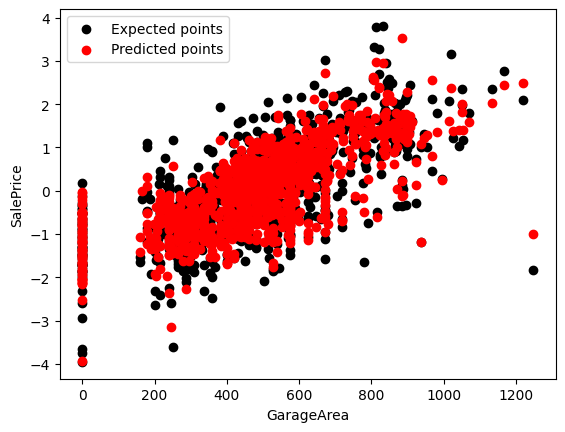

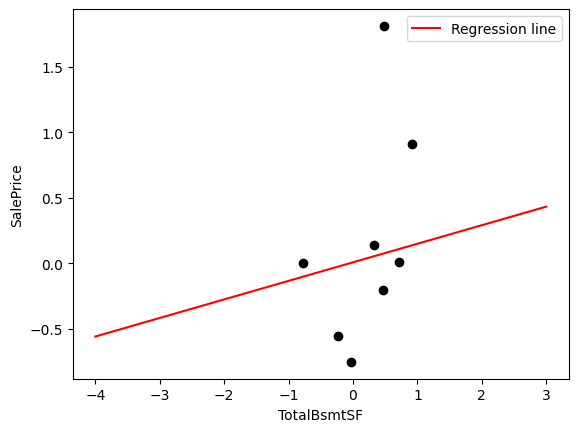

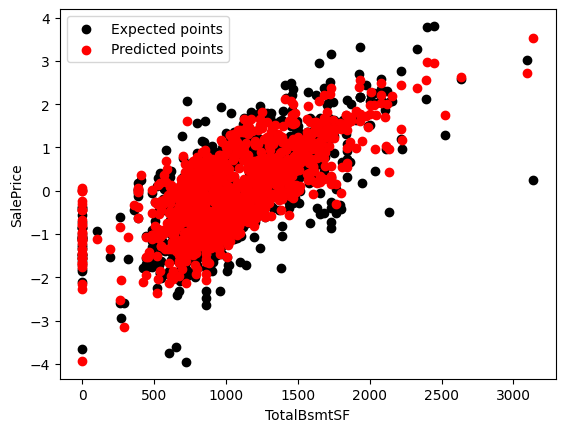

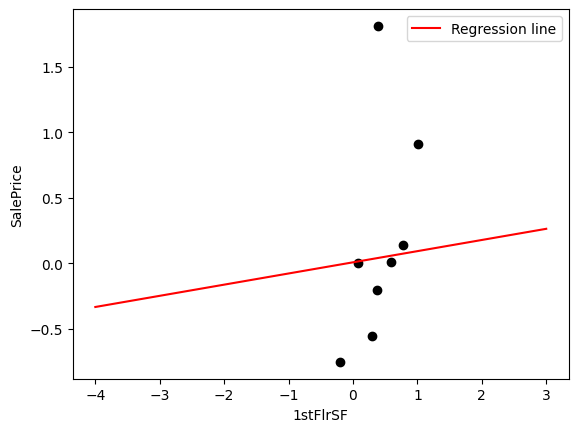

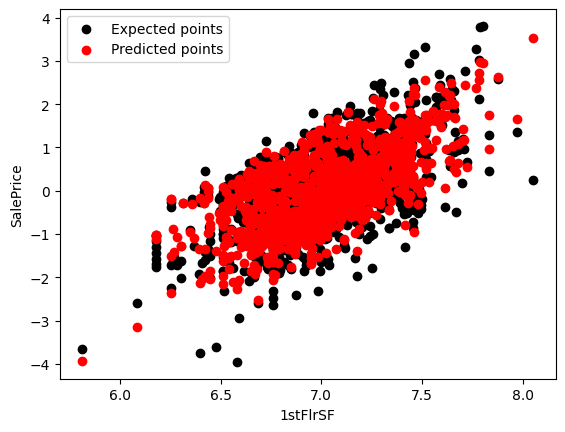

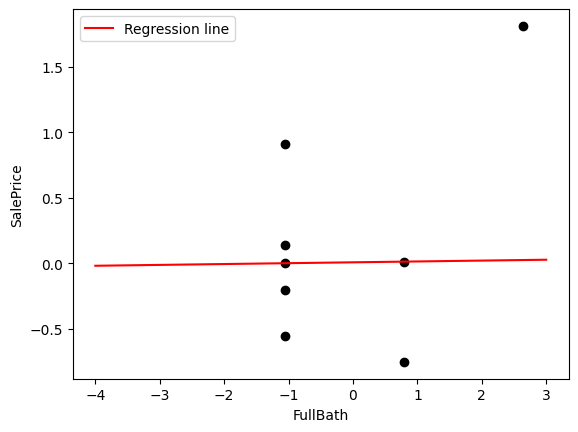

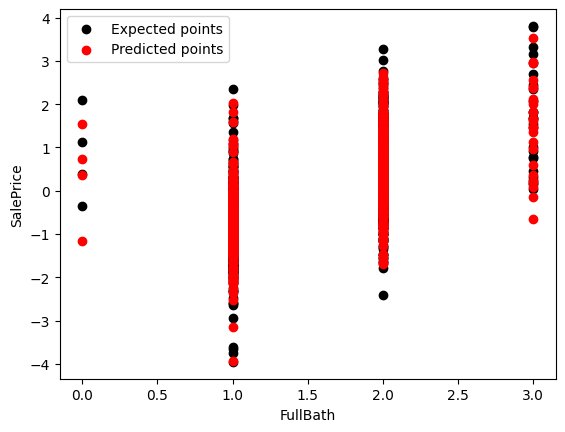

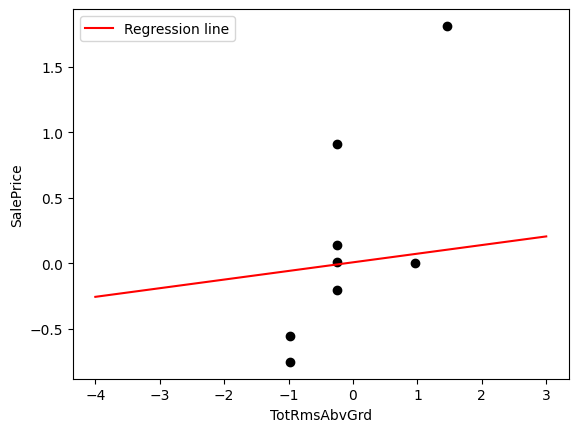

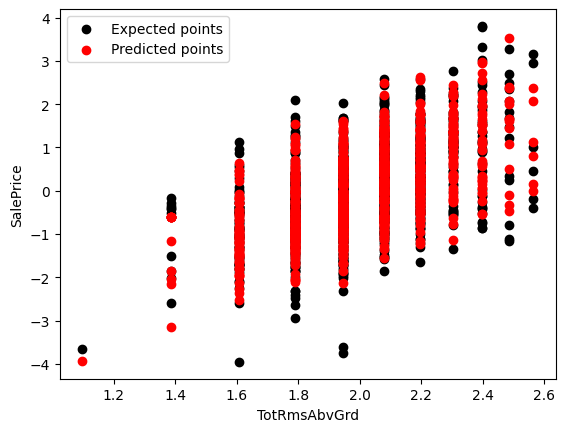

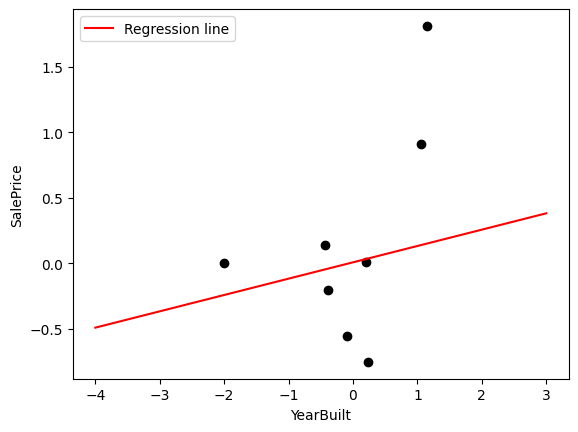

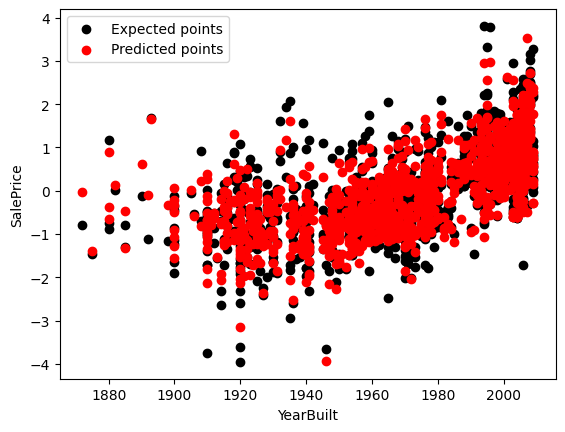

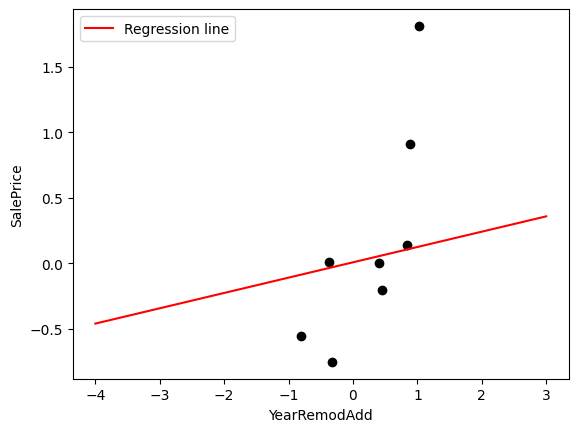

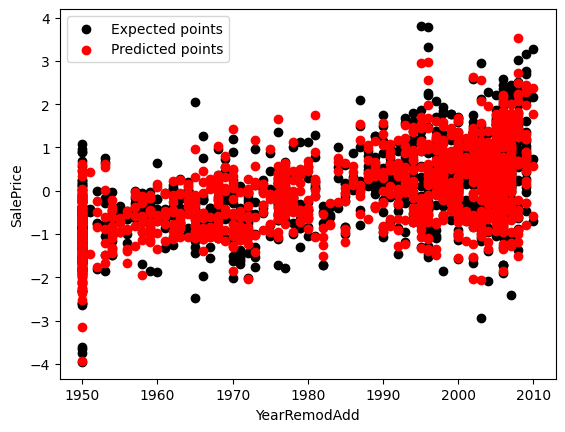

TRAIN ACCURACY: 95.58%


In [15]:
m, b = coeff
xi = -4
xf = 4

for col in features:
    plotter(x_trained, y_trained, col)
    line_plotter(m, b, xi, xf, col)
    plt.show()

    prediction_plotter(train_df, m, b, x_train, y_train, col)
    plt.show()
    
train_acc = r2score(y_trained.values, np.dot(x_trained, m) + b)
print(f"TRAIN ACCURACY: {train_acc*100:.2f}%")

## VISUALISING TESTING DATA RESULTS

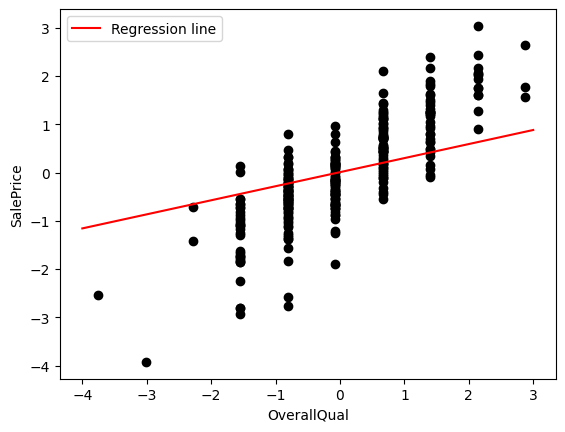

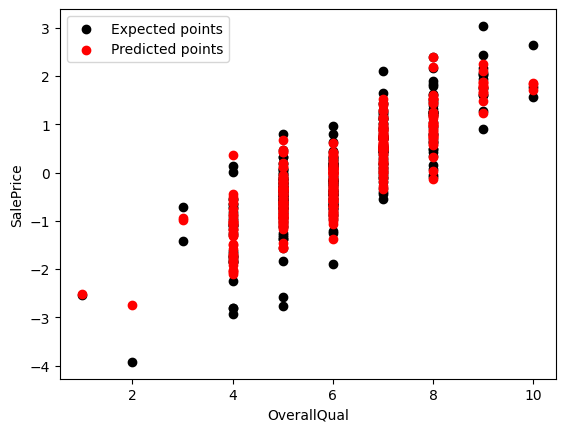

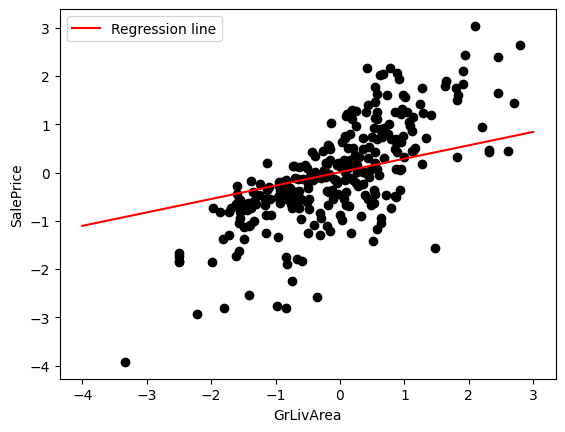

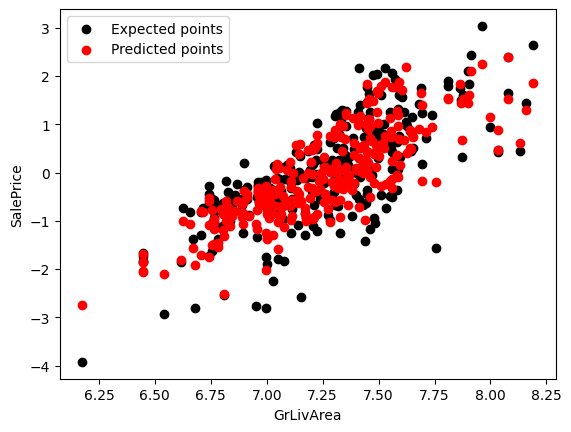

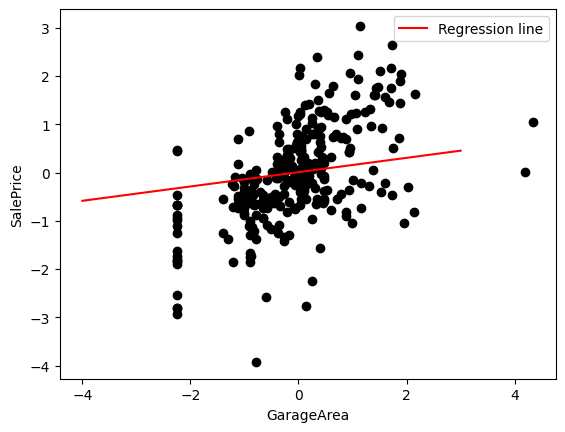

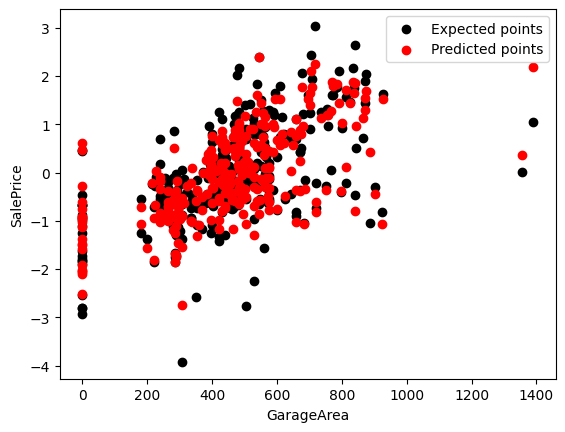

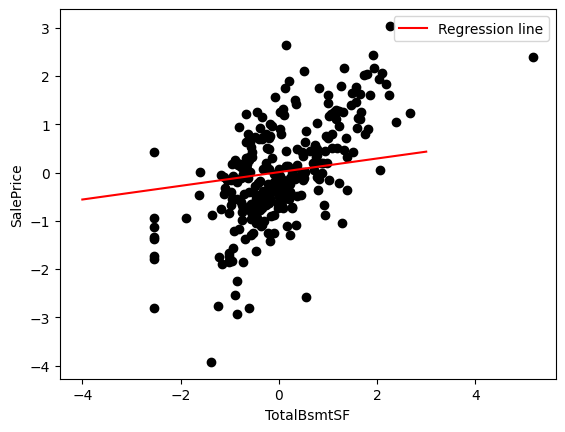

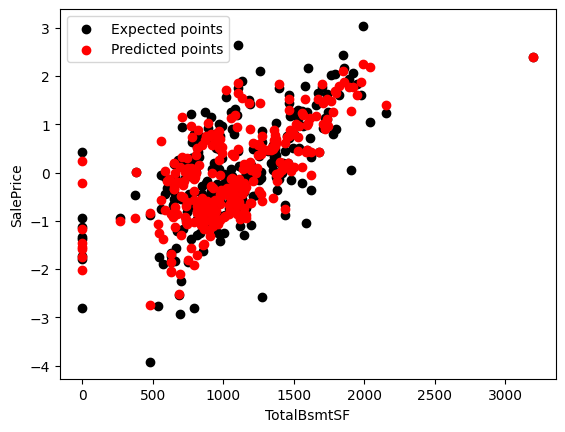

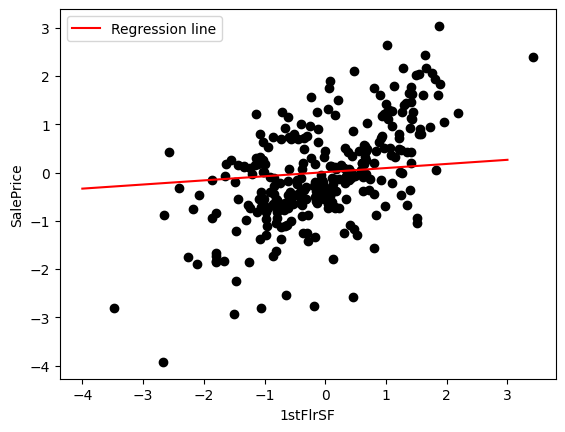

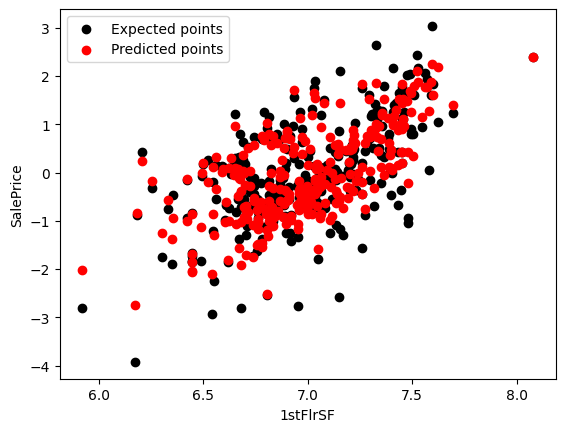

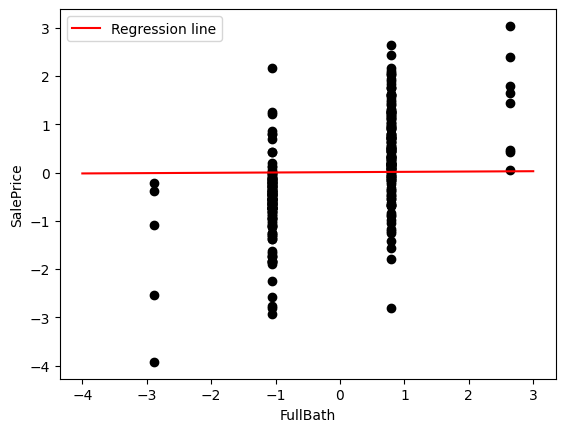

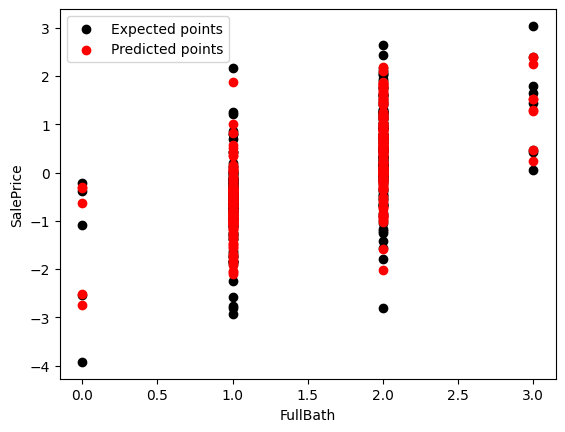

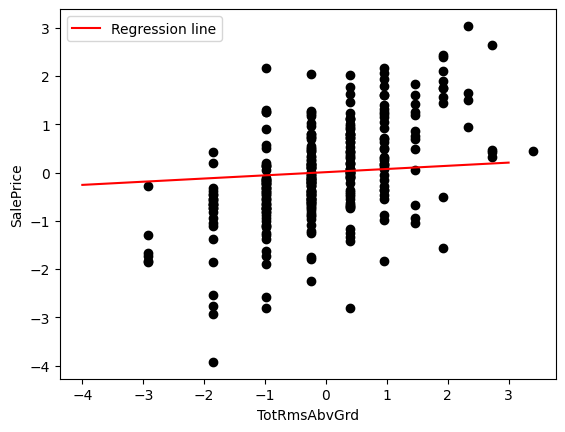

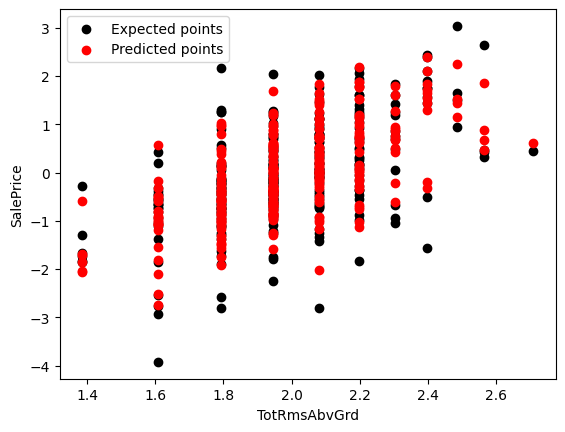

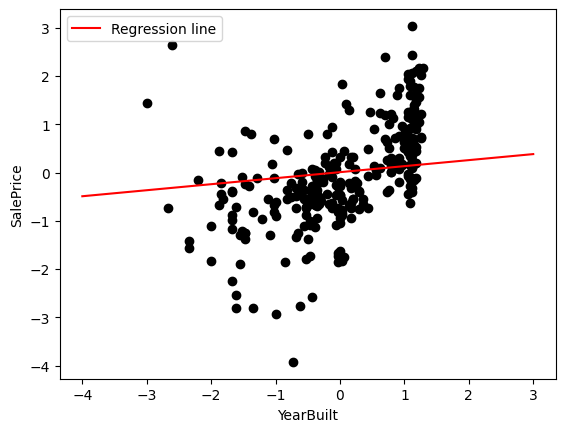

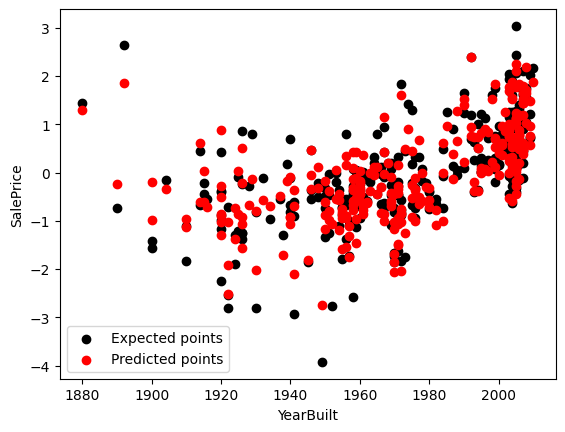

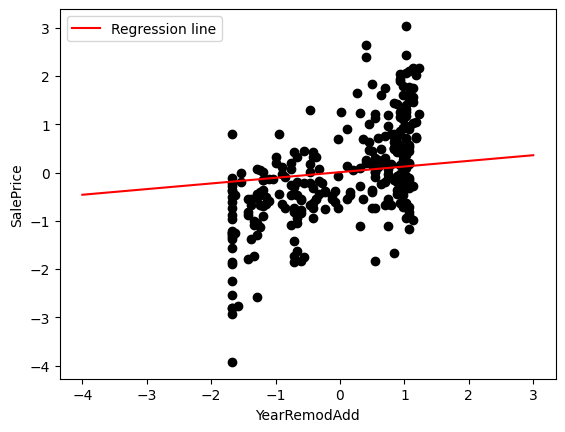

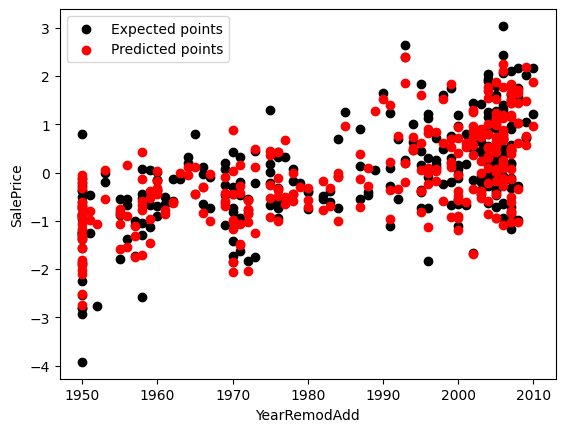

TEST ACCURACY: 84.55%


In [16]:
for col in features:
    plotter(x_test, y_test, col)
    line_plotter(m, b, xi, xf, col)
    plt.show()
    
    prediction_plotter(test_df, m, b, x_test, y_test, col)
    plt.show()
    
test_acc = r2score(y_test.values,  np.dot(x_test, m) + b)
print(f"TEST ACCURACY: {test_acc*100:.2f}%")

## ALL FEATURES

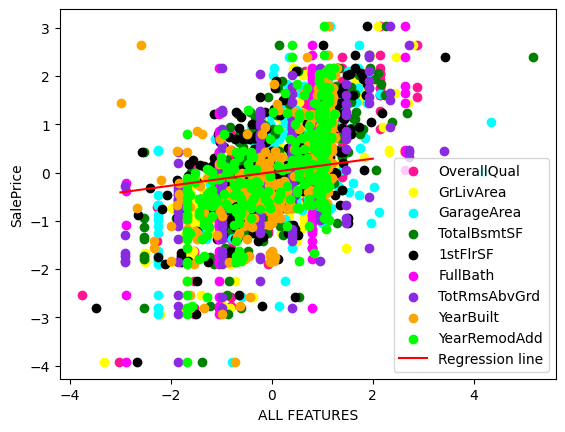

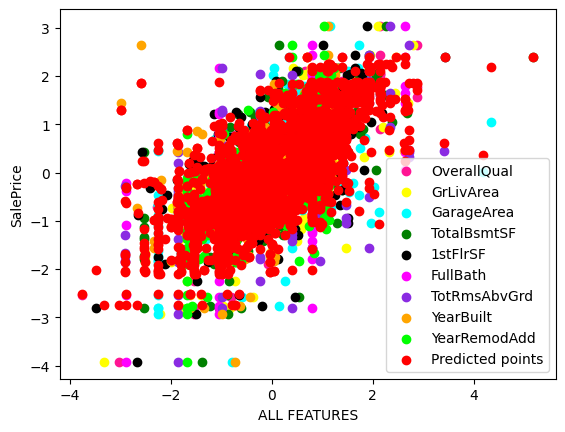

In [17]:
x_test_copy = x_test.copy()
x_test['SalePrice'] = y_test.values
multi_plotter(x_test, features, target)
line_plotter(m, b, -3, 3, features)
plt.show()

multi_plotter(x_test, features, target)
prediction_plotter(x_test, m, b, x_test_copy, y_test, features)
plt.show()

## MODEL PERFORMANCE EVALUATION
The graph below shows the amound by which the model's actual performance deviated from its expected performance. The closer the plotted points are to the ideal line, the better.

ACCURACY: 84.55%


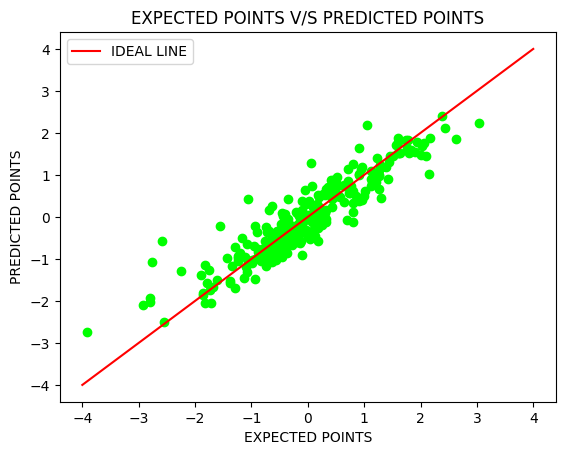

In [18]:
print(f"ACCURACY: {test_acc*100:.2f}%")

x = np.linspace(-4,4,10)
y = x

plt.plot(x, y, color = 'red', label = 'IDEAL LINE')
plt.scatter(y_test,  np.dot(x_test_copy, m) + b, color = 'lime')
plt.legend()
plt.title('EXPECTED POINTS V/S PREDICTED POINTS')
plt.xlabel('EXPECTED POINTS')
plt.ylabel('PREDICTED POINTS')
plt.show()

## CALCULATING THE SALEPRICE USING THE MODEL
Before getting the actual values, the data is unstandardized and the transformations are reversed.

In [19]:
def rev_feature_scale(scaled_df, train_df, columns):
    original_df = scaled_df.copy()
    for col in columns:
        original_df[col] = train_df[col].std() * scaled_df[col] + train_df[col].mean() 
    return original_df
    

test_df = rev_feature_scale(x_test, train_df, x_test.columns.values)
x_test = rev_feature_scale(x_test, train_df, x_test.columns.values)

transform(train_df, ['SalePrice','GrLivArea','1stFlrSF','TotRmsAbvGrd'], 'exp')
transform(test_df, ['SalePrice','GrLivArea','1stFlrSF','TotRmsAbvGrd'], 'exp')
transform(x_test, ['SalePrice','GrLivArea','1stFlrSF','TotRmsAbvGrd'], 'exp')

x_test.drop('SalePrice', axis = 1, inplace = True)

y_std = train_df['SalePrice'].std()
x_std = train_df[features].std()

y_mean = train_df['SalePrice'].mean()
x_mean = train_df[features].mean()

m = (m * y_std) / x_std
b = (b * y_std) + y_mean - np.dot(m, x_mean)

test_df.insert(3, 'GarageCars', garage_cars_col)
test_df['PredictedSalePrice'] = np.dot(x_test, m) + b

In [20]:
test_df.astype(int).head(60)

,OverallQual,GrLivArea,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,PredictedSalePrice
0,8,1969,753,3,1085,1120,2,8,2006,2006,281000,274177
1,6,1632,338,1,1240,1632,2,5,1958,1988,139000,184824
2,7,1223,480,2,600,520,2,3,2005,2005,147399,170868
3,5,1559,812,2,1559,1559,1,5,1948,1973,153500,186135
4,4,629,286,1,630,629,1,3,1970,2002,86000,70335
5,5,1354,0,0,644,807,2,5,1940,1999,127500,104400
6,6,980,0,0,945,980,2,3,1975,1975,127500,110527
7,5,1720,440,2,1461,1720,2,6,1968,1993,180000,193831
8,8,1414,403,2,707,706,2,5,2004,2004,177999,204205
9,5,1223,528,2,1086,1223,0,5,1979,1979,153337,153755


Based on the results, linear regression is a simple model. Yes it's not the most perfect or accurate ML model, but it does a decent job at predicting target values on an assumption of a linear relationship. Future versions of this notebook will come with more modifications to this model. The performance of this model will improve progressively as more and more concepts are applied to the regression procedure of this model.